In [275]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
# import pickle
# import math
# from area import area
# import fiona
# from shapely.geometry import shape
# from pyproj import Proj, transform, Transformer
# from shapely.geometry import Polygon
import folium as f
# from scipy.spatial import ConvexHull

g_pickle = "02_cambridge.gpickle"
g = nx.read_gpickle(g_pickle)

type(g)


networkx.classes.digraph.DiGraph

In [279]:
arbitrary_sub_g = random.sample(g.nodes().data(), 10) 

node_ids = [node[1]['id'] for node in arbitrary_sub_g]
print(node_ids)

points = []
for node in arbitrary_sub_g:
    lat, lon = node[1]['lat'], node[1]['lon']
    points.append([lat, lon])


points = np.array(points)
from scipy.spatial import Delaunay
tri = Delaunay(points)

['7324293485', '61325623', '1914295874', '436587028', '7628787223', '7771291089', '5742723393', '6868606380', '7629494091', '314502298']


In [280]:
tri = Delaunay(points)

In [281]:
tri

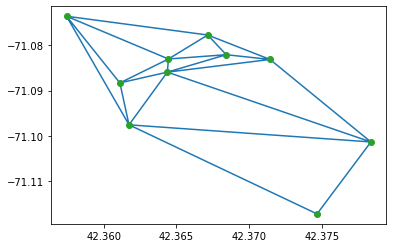

In [282]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [283]:
tri.simplices

array([[6, 9, 0],
       [1, 2, 0],
       [2, 6, 0],
       [4, 8, 1],
       [8, 2, 1],
       [6, 3, 5],
       [2, 3, 6],
       [7, 8, 4],
       [8, 7, 2],
       [7, 4, 5],
       [3, 7, 5],
       [7, 3, 2]], dtype=int32)

In [284]:
tri.points.tolist()

[[42.3783749, -71.1013051],
 [42.371438, -71.083127],
 [42.3643727, -71.0859218],
 [42.3611079, -71.0882959],
 [42.3671512, -71.0777396],
 [42.3574398, -71.0736035],
 [42.3617372, -71.0975293],
 [42.3644502, -71.083022],
 [42.3684244, -71.0820791],
 [42.3746703, -71.1171629]]

In [285]:
def edges_from_simplex(tri):
    edges = [] 
    points = tri.points
    for simplex in tri.simplices:
        a = points[(simplex[0])].tolist()
        b = points[simplex[1]].tolist()
        c = points[simplex[2]].tolist()
        
        edges.append([a,b])
        edges.append([b,c])
        edges.append([c,a])
    
    return_edges = []
    for edge in edges:
        if edge not in return_edges and [edge[1], edge[0]] not in return_edges:
            return_edges.append(edge)
        
    
    return return_edges


In [286]:
edges_from_simplex(tri)

[[[42.3617372, -71.0975293], [42.3746703, -71.1171629]],
 [[42.3746703, -71.1171629], [42.3783749, -71.1013051]],
 [[42.3783749, -71.1013051], [42.3617372, -71.0975293]],
 [[42.371438, -71.083127], [42.3643727, -71.0859218]],
 [[42.3643727, -71.0859218], [42.3783749, -71.1013051]],
 [[42.3783749, -71.1013051], [42.371438, -71.083127]],
 [[42.3643727, -71.0859218], [42.3617372, -71.0975293]],
 [[42.3671512, -71.0777396], [42.3684244, -71.0820791]],
 [[42.3684244, -71.0820791], [42.371438, -71.083127]],
 [[42.371438, -71.083127], [42.3671512, -71.0777396]],
 [[42.3684244, -71.0820791], [42.3643727, -71.0859218]],
 [[42.3617372, -71.0975293], [42.3611079, -71.0882959]],
 [[42.3611079, -71.0882959], [42.3574398, -71.0736035]],
 [[42.3574398, -71.0736035], [42.3617372, -71.0975293]],
 [[42.3643727, -71.0859218], [42.3611079, -71.0882959]],
 [[42.3644502, -71.083022], [42.3684244, -71.0820791]],
 [[42.3671512, -71.0777396], [42.3644502, -71.083022]],
 [[42.3644502, -71.083022], [42.3643727, 

In [297]:
ZIP_CODE = '02108'
m = f.Map(location = [42.3611108,-71.119977], zoom_start=14)


style = {
    "fillColor": "salmon",
    "fillOpacity": .2,
    "weight": 2,
    "opacity": 1
}

with open('zip_code_dict_NEW.pickle', 'rb') as handle:
    zip_code_dict = pickle.load(handle)
print(len(zip_code_dict))

for node_data in g.nodes().data():
    node_id = node_data[1]["id"]
    lon,lat = node_data[1]['lon'], node_data[1]['lat'] 
    if node_id in node_ids:
        m.add_child(f.Marker(location=[lat,lon], color="blue", radius=1, tooltip=node_id))
    else:
        m.add_child(f.CircleMarker(location=[lat,lon], color="red", radius=1, tooltip=node_id))
    

        
# f.GeoJson(polygons[ZIP_CODE], style_function=lambda x: style).add_to(m)

m

96360


In [298]:
print(node_ids)
nx.shortest_path_length(g, '5742723393', '314502298', weight='havlen')

['7324293485', '61325623', '1914295874', '436587028', '7628787223', '7771291089', '5742723393', '6868606380', '7629494091', '314502298']


3253.7590414372035

In [296]:
nx.shortest_path_length(g, '61325623', '314502298', weight='havlen')

NetworkXNoPath: Node 314502298 not reachable from 61325623

In [224]:
"""Distance helpers."""

import math


EARTH_CIRCUMFERENCE = 6378137     # earth circumference in meters


def great_circle_distance(latlong_a, latlong_b):
    """
    >>> coord_pairs = [
    ...     # between eighth and 31st and eighth and 30th
    ...     [(40.750307,-73.994819), (40.749641,-73.99527)],
    ...     # sanfran to NYC ~2568 miles
    ...     [(37.784750,-122.421180), (40.714585,-74.007202)],
    ...     # about 10 feet apart
    ...     [(40.714732,-74.008091), (40.714753,-74.008074)],
    ...     # inches apart
    ...     [(40.754850,-73.975560), (40.754851,-73.975561)],
    ... ]
    
    >>> for pair in coord_pairs:
    ...     great_circle_distance(pair[0], pair[1]) # doctest: +ELLIPSIS
    83.325362855055...
    4133342.6554530...
    2.7426970360283...
    0.1396525521278...
    """
    lat1, lon1 = latlong_a
    lat2, lon2 = latlong_b

    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = (math.sin(dLat / 2) * math.sin(dLat / 2) +
            math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * 
            math.sin(dLon / 2) * math.sin(dLon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = EARTH_CIRCUMFERENCE * c
    
    return d